# Credit Card Transactions Dataset

The Credit Card Transactions Dataset provides detailed records of credit card transactions, including information about transaction times, amounts, and associated personal and merchant details.

### Variable Descriptions:

- **trans_date_trans_time**: Timestamp of the transaction.
- **cc_num**: Credit card number (hashed or anonymized).
- **merchant**: Merchant or store where the transaction occurred.
- **category**: Type of transaction (e.g., grocery, entertainment).
- **amt**: Amount of the transaction.
- **first**: First name of the cardholder.
- **last**: Last name of the cardholder.
- **gender**: Gender of the cardholder.
- **street**: Address details of the cardholder.
- **city**: Address details of the cardholder.
- **state**: Address details of the cardholder.
- **zip**: Address details of the cardholder.
- **lat**: Geographical coordinates of the transaction.
- **long**: Geographical coordinates of the transaction.
- **city_pop**: Population of the city where the transaction occurred.
- **job**: Occupation of the cardholder.
- **dob**: Date of birth of the cardholder.
- **trans_num**: Unique transaction number.
- **unix_time**: Unix timestamp of the transaction.
- **merch_lat**: Geographical coordinates of the merchant.
- **merch_long**: Geographical coordinates of the merchant.
- **is_fraud**: Indicator of whether the transaction is fraudulent.
- **merch_zipcode**: Geographical coordinates of the merchant.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer # columnTransformer for applying different preprocessing steps to columns
from sklearn.impute import SimpleImputer, KNNImputer # imputers for handling missing data
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,  cross_val_score # functions for splitting data and cross-validation
# from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline # Pipeline for creating a machine learning pipeline
from sklearn.preprocessing import RobustScaler # RobustScaler for scaling numerical data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, OneHotEncoder, QuantileTransformer # scalers for numerical data transformation and OneHotEncoder for encoding categorical variables
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier for the classification model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score # metrics for model evaluation
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import pickle
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")
import shap

In [2]:
# load the CSV file into a dataframe
df = pd.read_csv('G:/DSI/team_5_project/data/raw/credit_card_transactions.csv', header = 0)
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,22644.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,42442.0


# Data Exploration & Feature Engineering:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

**Excluding some columns that are less relevant or potentially non-informative:**

- **cc_num**: Credit card numbers, even if hashed or anonymized, are generally not needed for fraud detection. They do not contribute directly to identifying fraudulent transactions and could cause privacy concerns.

- **first, last**: The cardholder's first and last names are not relevant for fraud detection and could be sensitive personal information. Hence, they are excluded to focus on transactional data.

- **street, city, state, zip**: Address details, while useful for identifying location, are less relevant for fraud detection compared to geographical coordinates. Coordinates enable more precise distance calculations between cardholder, transaction, and merchant locations, which are more effective for identifying anomalies.

- **dob**: The date of birth does not contribute significantly to detecting fraudulent activity, as fraud detection is more concerned with transaction behaviors rather than individual attributes.

- **trans_num**: The unique transaction number is mainly used for tracking transactions but does not directly impact fraud detection.

- **unix_time**: The Unix timestamp is redundant given the presence of the trans_date_trans_time column, which already captures timestamp information.

- **merch_zipcode**: Since merchant coordinates are available, the merchant zipcode is not necessary for analysis and is therefore excluded.

- To detect distance anomalies, we will compute the absolute differences in latitude and longitude between transactions and merchants. This will help identify unusually large distances, which might indicate fraud. The results will be saved in a new column called distance_trans_merch.

- We will retain only the distance_trans_merch column and exclude the original latitude and longitude columns, as well as the merchant coordinates.

In [4]:
df['distance_trans_merch'] = abs(df['lat'] - df['merch_lat']) + abs(df['long'] - df['merch_long'])
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,distance_trans_merch
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,0.937722
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,0.295285
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,1.077423
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,1.251002
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,1.084740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN,1.663169
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0,1.096247
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0,1.368284
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0,1.263720


We will convert trans_date_trans_time to datetime format to extract key features: date, day of the week, month, and hour of the day. These features will help identify patterns in transactions that occur at unusual times or dates, which may indicate potential fraud.

In [5]:
# convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# extract date, day of the week, month, and hour of the day
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_hour_of_day'] = df['trans_date_trans_time'].dt.hour

In [6]:
# columns remaining for analysis
columns = [
    'trans_year',
    'trans_day_of_week',
    'trans_month',
    'trans_hour_of_day',
    'merchant',
    'category',
    'amt',
    'gender',
    'city_pop',
    'job',
    'is_fraud',
    'distance_trans_merch'
]

In [7]:
df1 = df[columns]
df1

,trans_year,trans_day_of_week,trans_month,trans_hour_of_day,merchant,category,amt,gender,city_pop,job,is_fraud,distance_trans_merch
0,2019,Tuesday,1,0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,3495,"Psychologist, counselling",0,0.937722
1,2019,Tuesday,1,0,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,149,Special educational needs teacher,0,0.295285
2,2019,Tuesday,1,0,fraud_Lind-Buckridge,entertainment,220.11,M,4154,Nature conservation officer,0,1.077423
3,2019,Tuesday,1,0,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,1939,Patent attorney,0,1.251002
4,2019,Tuesday,1,0,fraud_Keeling-Crist,misc_pos,41.96,M,99,Dance movement psychotherapist,0,1.084740
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020,Sunday,6,12,fraud_Reichel Inc,entertainment,15.56,M,258,Geoscientist,0,1.663169
1296671,2020,Sunday,6,12,fraud_Abernathy and Sons,food_dining,51.70,M,100,"Production assistant, television",0,1.096247
1296672,2020,Sunday,6,12,fraud_Stiedemann Ltd,food_dining,105.93,M,899,Naval architect,0,1.368284
1296673,2020,Sunday,6,12,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,1126,Volunteer coordinator,0,1.263720


In [8]:
# basic information about the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   trans_year            1296675 non-null  int32  
 1   trans_day_of_week     1296675 non-null  object 
 2   trans_month           1296675 non-null  int32  
 3   trans_hour_of_day     1296675 non-null  int32  
 4   merchant              1296675 non-null  object 
 5   category              1296675 non-null  object 
 6   amt                   1296675 non-null  float64
 7   gender                1296675 non-null  object 
 8   city_pop              1296675 non-null  int64  
 9   job                   1296675 non-null  object 
 10  is_fraud              1296675 non-null  int64  
 11  distance_trans_merch  1296675 non-null  float64
dtypes: float64(2), int32(3), int64(2), object(5)
memory usage: 103.9+ MB


In [9]:
# summary statistic of numerical features
print(df1.describe())

         trans_year   trans_month  trans_hour_of_day           amt  \
count  1.296675e+06  1.296675e+06       1.296675e+06  1.296675e+06   
mean   2.019287e+03  6.142150e+00       1.280486e+01  7.035104e+01   
std    4.522452e-01  3.417703e+00       6.817824e+00  1.603160e+02   
min    2.019000e+03  1.000000e+00       0.000000e+00  1.000000e+00   
25%    2.019000e+03  3.000000e+00       7.000000e+00  9.650000e+00   
50%    2.019000e+03  6.000000e+00       1.400000e+01  4.752000e+01   
75%    2.020000e+03  9.000000e+00       1.900000e+01  8.314000e+01   
max    2.020000e+03  1.200000e+01       2.300000e+01  2.894890e+04   

           city_pop      is_fraud  distance_trans_merch  
count  1.296675e+06  1.296675e+06          1.296675e+06  
mean   8.882444e+04  5.788652e-03          1.000600e+00  
std    3.019564e+05  7.586269e-02          4.081708e-01  
min    2.300000e+01  0.000000e+00          3.360000e-04  
25%    7.430000e+02  0.000000e+00          7.081180e-01  
50%    2.456000e+03  

### Identify numerical and categorical columns:

In [10]:
# identify numerical and categorical columns
num_cols = [
    'trans_year', 'trans_month', 'trans_hour_of_day', 'amt', 'city_pop', 'distance_trans_merch']

cat_cols = [
    'trans_day_of_week', 'merchant', 'category', 'gender', 'job']

## Data Exploration

**Numeric variables:**

Distribution of numeric variables:

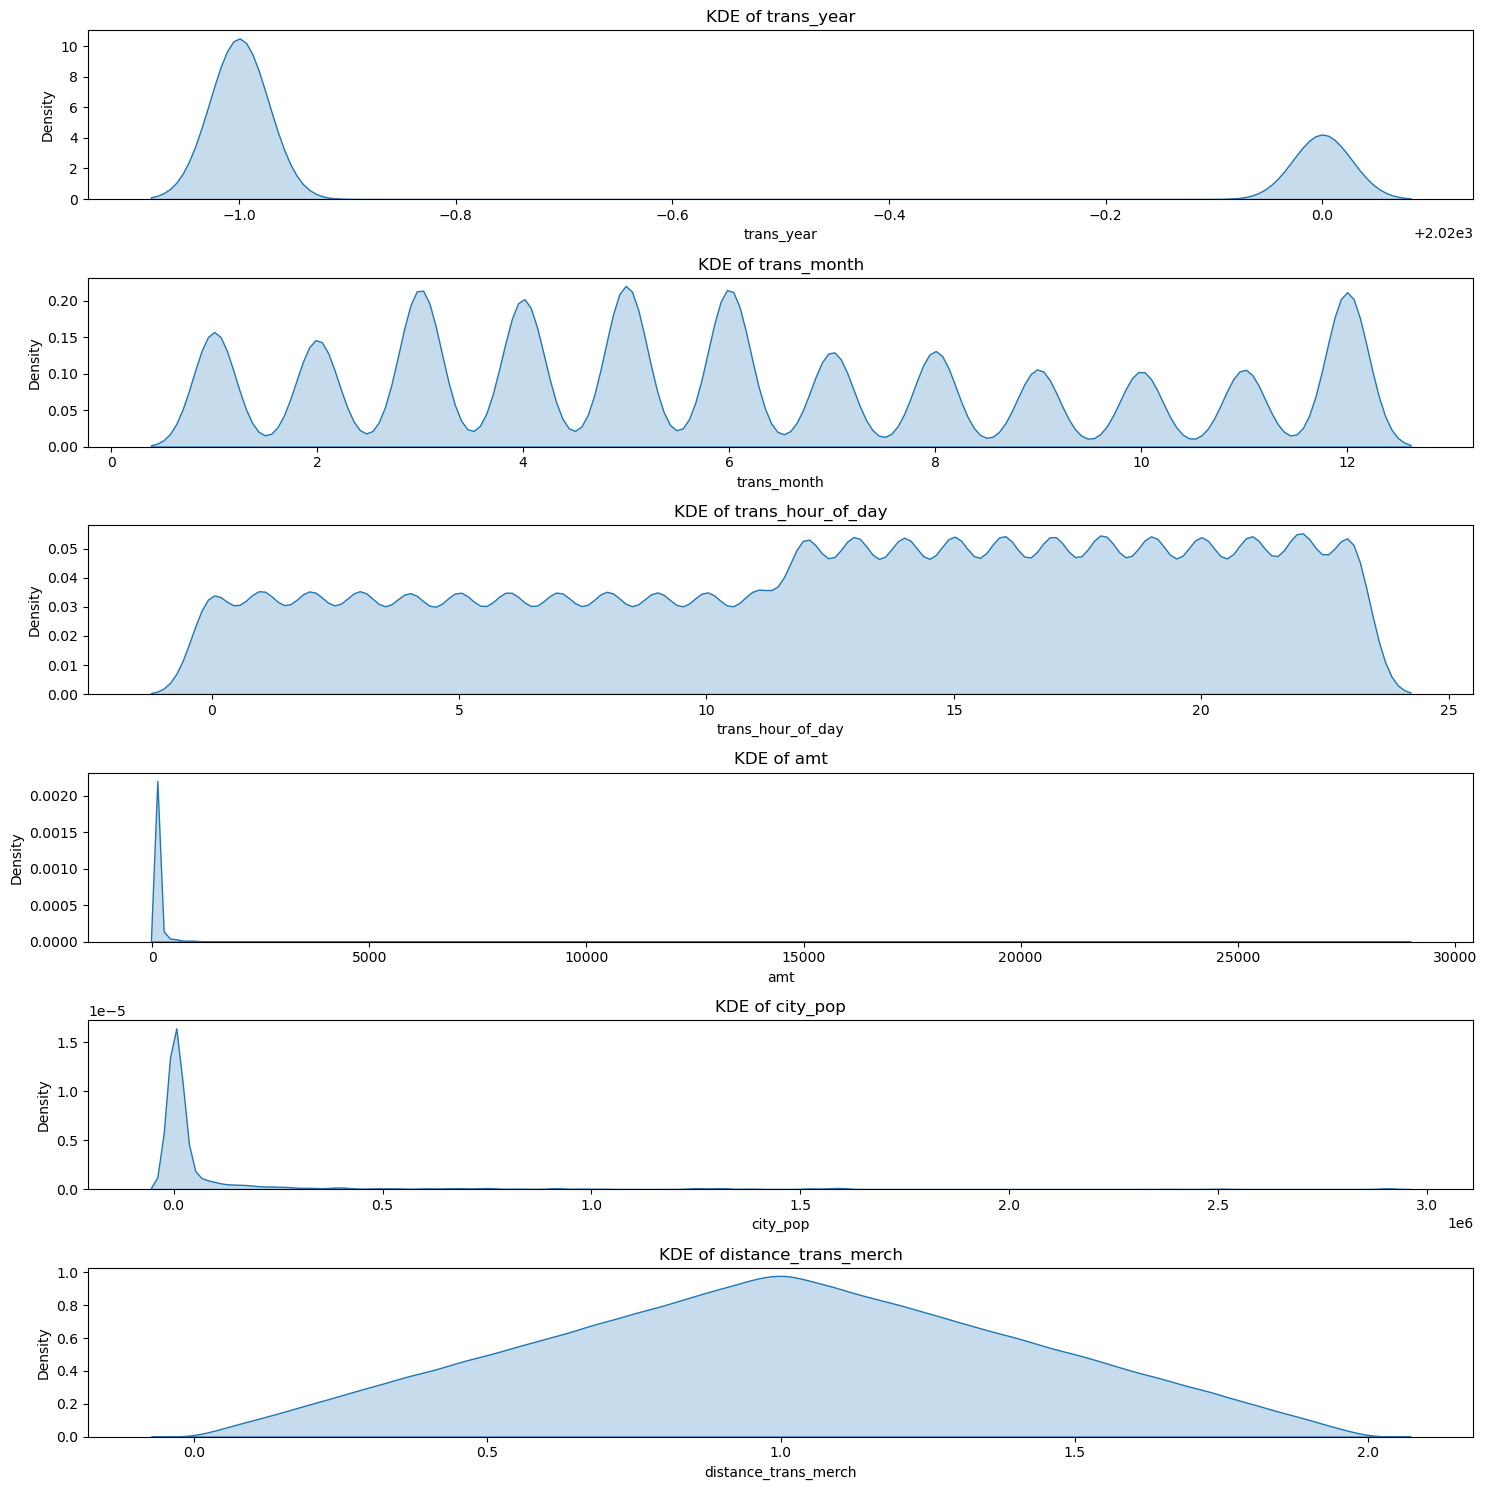

In [11]:
# kernel density estimate plots to show the data distribution for numeric variables

# create the subplot grid
fig, axes = plt.subplots(len(num_cols), figsize=(15, 15))

# flatten the axes array for easy iteration and plot
for ax, column in zip(axes.flatten(), num_cols):
    sns.kdeplot(df1[column], ax=ax, shade=True)
    ax.set_title(f'KDE of {column}')
    ax.grid(False)  # Remove gridlines

# remove any empty subplots
for ax in axes.flatten()[len(num_cols):]:
    fig.delaxes(ax)

# adjust layout
plt.tight_layout()
plt.show()

The KDE plots above show that columns 'amt' & 'city_pop' have skewness.

**Checking for skewness value for 'amt' & 'city_pop' columns:**

In [12]:
skewness = df['amt'].skew()
# decision based on skewness
if abs(skewness) > 0.5:
    print(f'Feature has skewness of {skewness:.2f}. Consider transformation.')
else:
    print(f'Feature has skewness of {skewness:.2f}. Transformation may not be necessary.')

Feature has skewness of 42.28. Consider transformation.


In [13]:
skewness = df['city_pop'].skew()
# decision based on skewness
if abs(skewness) > 0.5:
    print(f'Feature has skewness of {skewness:.2f}. Consider transformation.')
else:
    print(f'Feature has skewness of {skewness:.2f}. Transformation may not be necessary.')

Feature has skewness of 5.59. Consider transformation.


**Box Plot to check for outliers for numeric variables:**

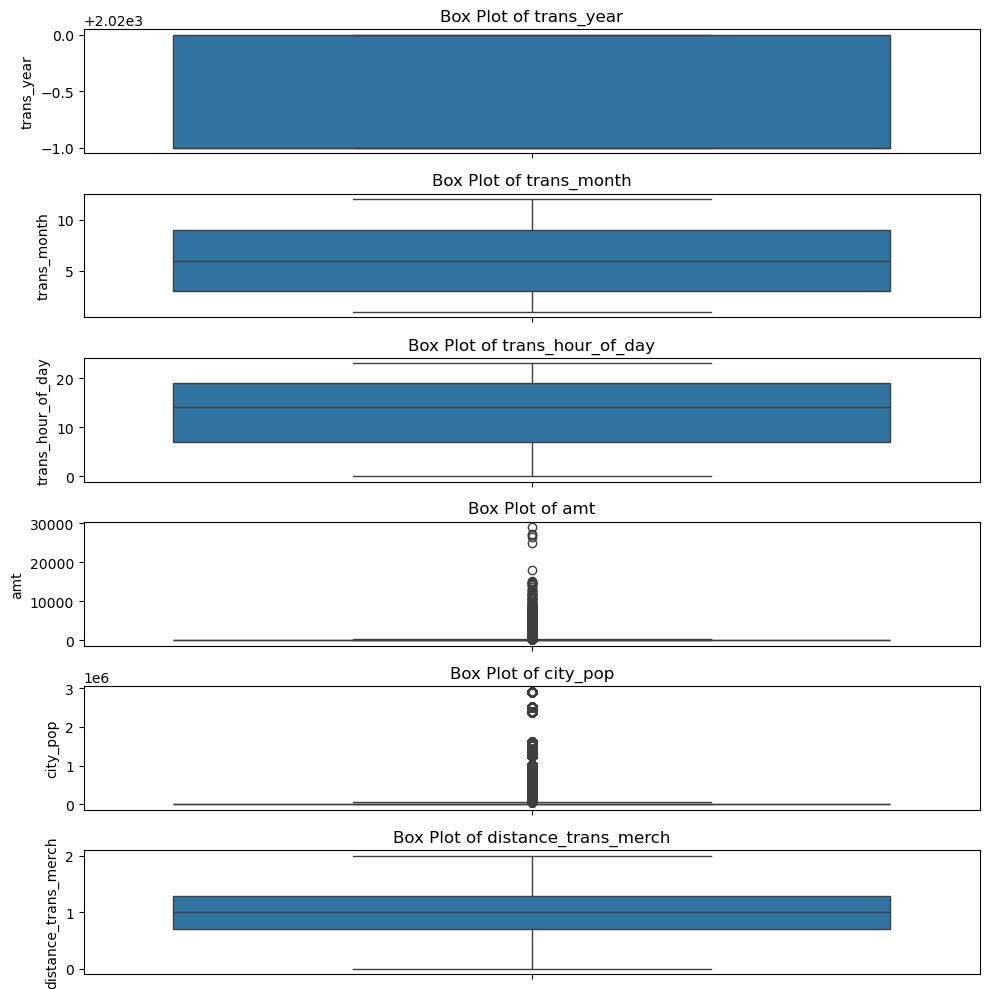

In [14]:
# create a 2x4 grid for box plots
fig, axes = plt.subplots(len(num_cols), figsize=(10, 10))

# flatten the axes array for easy iteration
axes = axes.flatten()

# plot each feature in a separate subplot
for i, col in enumerate(num_cols):
    sns.boxplot(y=df1[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# adjust layout
plt.tight_layout()
plt.show()

The box plot above show that columns 'amt' & 'city_pop' have outliers.

**Checking for number of outliers for 'amt' & 'city_pop' columns:**

In [15]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# calculate outliers for 'amt' in df1
outliers_count = count_outliers(df1['amt'])

# decision based on outlier count
if outliers_count > 0.05 * len(df1): 
    print(f'Feature has {outliers_count} outliers. Consider handling outliers.')
else:
    print(f'Feature has {outliers_count} outliers. Outlier handling may not be necessary.')

Feature has 67290 outliers. Consider handling outliers.


In [16]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

# calculate outliers for 'city_pop' in df1
outliers_count = count_outliers(df1['city_pop'])

# decision based on outlier count
if outliers_count > 0.05 * len(df1):
    print(f'Feature has {outliers_count} outliers. Consider handling outliers.')
else:
    print(f'Feature has {outliers_count} outliers. Outlier handling may not be necessary.')

Feature has 242674 outliers. Consider handling outliers.


**Categorocal variables:**

Distribution of categorocal variables:

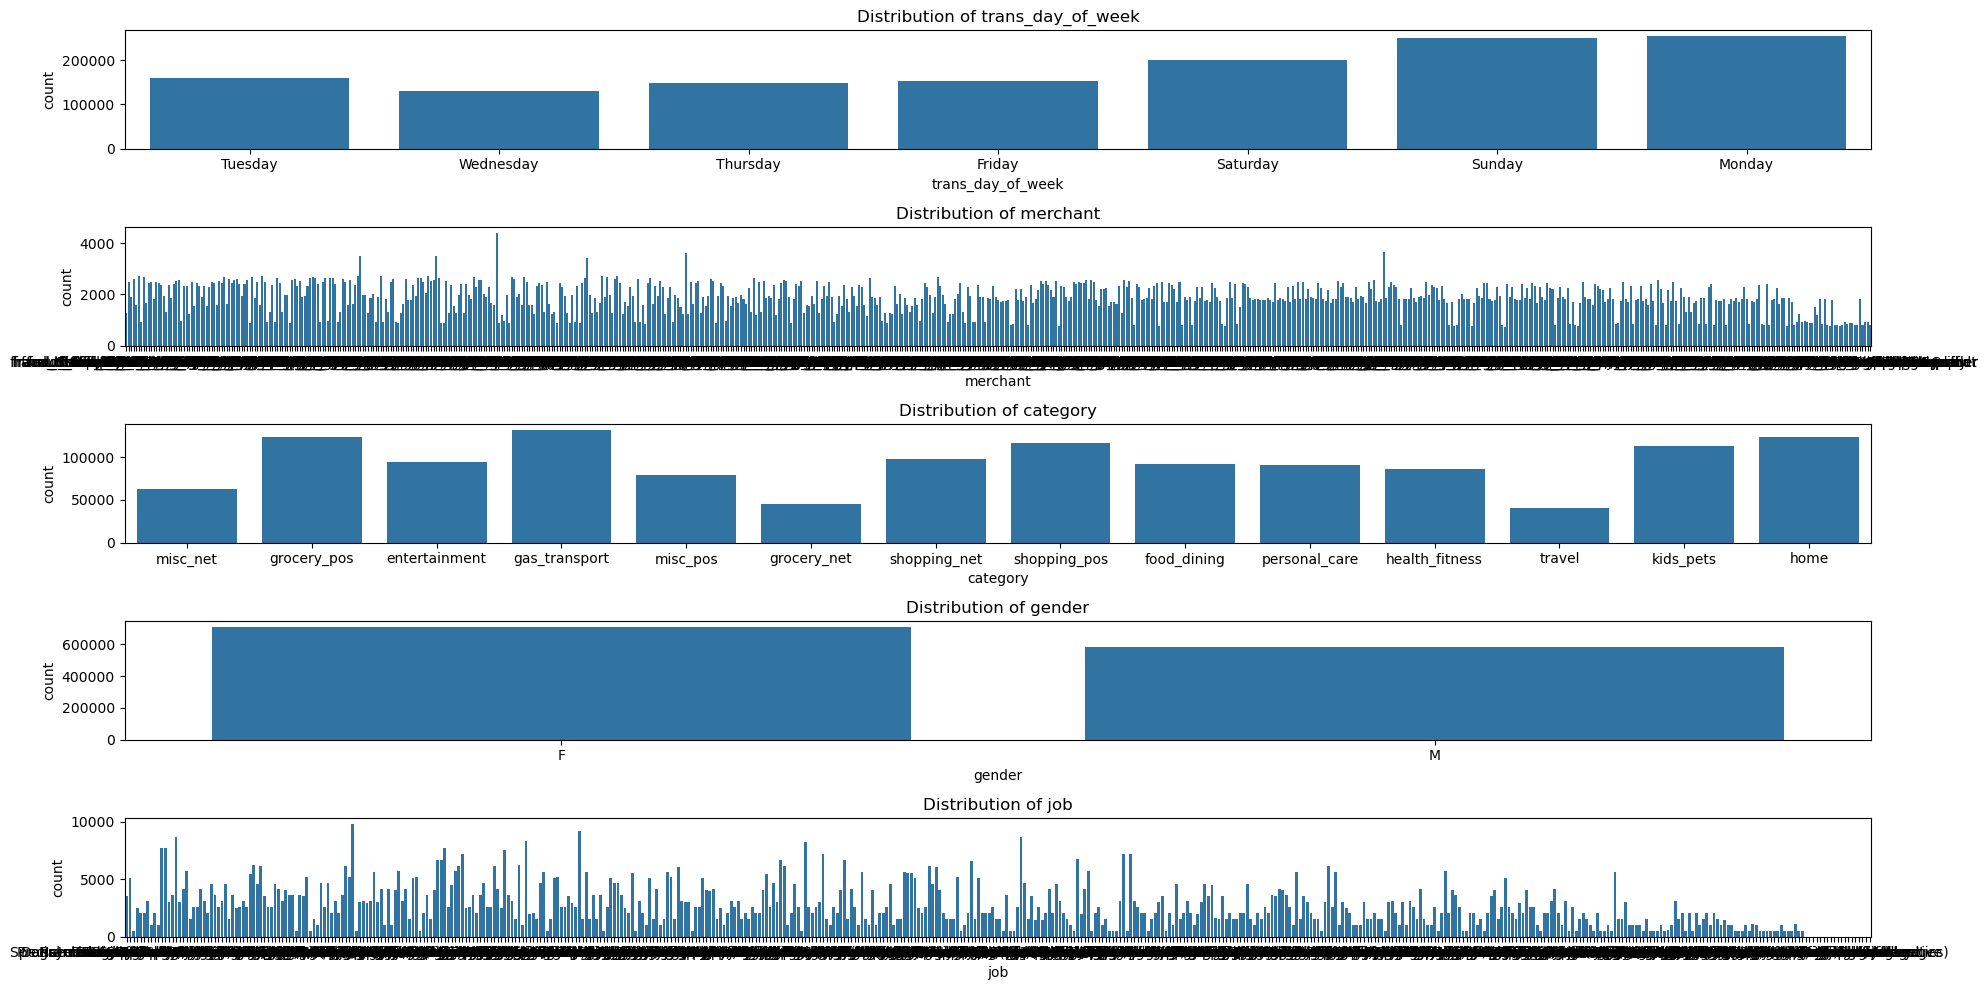

In [17]:
# plots to show the data distribution for categorical variables

# create the subplot grid
fig, axes = plt.subplots(5, 1, figsize=(20, 10))

# flatten the axes array for easy iteration and plot
for ax, column in zip(axes.flatten(), cat_cols):
    sns.countplot(x=df1[column], ax=ax)  # use 'x' to make vertical bar plots
    ax.set_title(f'Distribution of {column}')

# adjust layout
plt.tight_layout()
plt.show()

**Target variable:**

Distribution of the target variable "is_fraud":

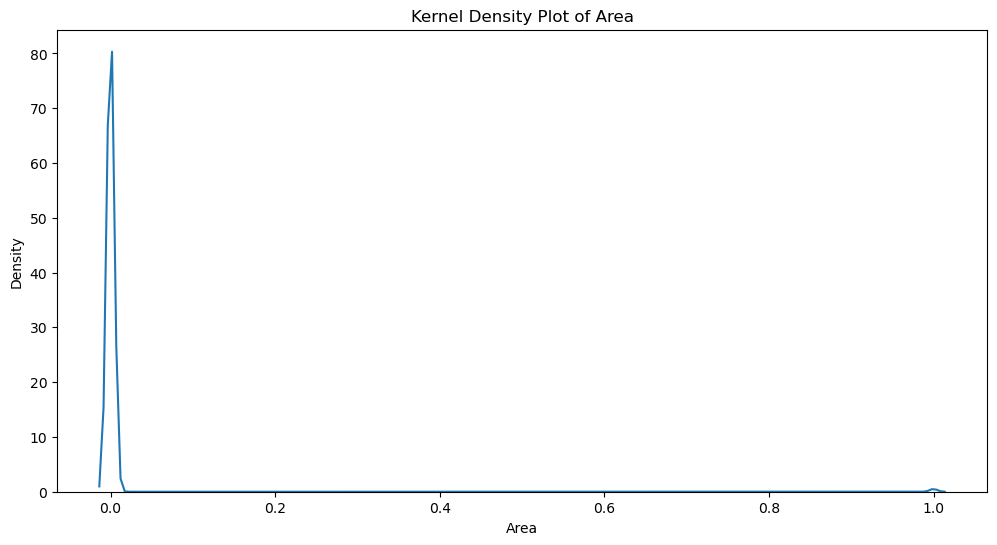

In [18]:
# plot kernel density estimate for target variable ('is_fraud') distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(df1['is_fraud'])
plt.title('Kernel Density Plot of Area')
plt.xlabel('Area')
plt.ylabel('Density')
plt.show()

In [19]:
# count the number of occurrences of each class in the 'is_fraud' column
# this helps in understanding the distribution of fraudulent vs. non-fraudulent transactions
df1['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

# Get X and Y

Create the features data frame and target data.

In [20]:
# create the features data frame and target data.
X = df1.drop(columns = 'is_fraud')
Y = df1['is_fraud']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Preprocessing

### Preproc 1
#### Used 'StandardScaler' for scaling numerical columns, and used 'OneHotEncoder' for categorical columns.

In [21]:
# identify numerical and categorical columns

# define numerical columns for transformation in preproc1
num_cols = ['amt', 'city_pop','distance_trans_merch']
cat_cols = ['trans_year', 'trans_day_of_week', 'trans_month','trans_hour_of_day' ,'merchant', 'category', 'gender', 'job']

# creatig the pipeline for numerical columns in preproc1
num_pipe_1 = Pipeline([ 
    ('scaler', StandardScaler())
])

# creatig the pipeline for categorical columns preproc1
cat_pipe_1 = Pipeline([  
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

# preproc1, ColumnTransformer
preproc1 = ColumnTransformer([
    ('num_transform', num_pipe_1, num_cols),
    ('cat_transform', cat_pipe_1, cat_cols)   
])

preproc1

ColumnTransformer(transformers=[('num_transform',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['amt', 'city_pop', 'distance_trans_merch']),
                                ('cat_transform',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['trans_year', 'trans_day_of_week',
                                  'trans_month', 'trans_hour_of_day',
                                  'merchant', 'category', 'gender', 'job'])])

### Preproc 2

In [22]:
# define numerical columns for transformation in preproc2
num_cols_transform1 = ['distance_trans_merch']
num_cols_transform2 = ['amt', 'city_pop']
cat_cols = ['trans_year', 'trans_day_of_week', 'trans_month','trans_hour_of_day' ,'merchant', 'category', 'gender', 'job']

# create the pipelines for numerical transformations and categorical encoding in preproc2
num_pipe_2 = Pipeline([
    ('scaler', StandardScaler())
])

num_pipe_2_Quantile = Pipeline([
    ('transform', QuantileTransformer(n_quantiles=5)),
    ('scaler', StandardScaler())
])

cat_pipe_2 = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

# preproc2, ColumnTransformer
preproc2 = ColumnTransformer([
    ('num_transform1', num_pipe_2, num_cols_transform1),
    ('num_transform2', num_pipe_2_Quantile, num_cols_transform2),
    ('cat_transform', cat_pipe_2, cat_cols)
])

preproc2

ColumnTransformer(transformers=[('num_transform1',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['distance_trans_merch']),
                                ('num_transform2',
                                 Pipeline(steps=[('transform',
                                                  QuantileTransformer(n_quantiles=5)),
                                                 ('scaler', StandardScaler())]),
                                 ['amt', 'city_pop']),
                                ('cat_transform',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['trans_year', 'trans_day_of_week',
                                  'trans_month', 'trans_hour_of_day',
                                  'merchant', 'category', 'gender', 'job'])])

**QuantileTransformer**: This transformer maps the data to a uniform or normal distribution. It can be useful for transforming skewed distributions to a more Gaussian-like distribution.

# Model Pipeline

#### Define Custom Scoring Functions:

In [23]:
from sklearn.metrics import confusion_matrix, make_scorer

False Positive Rate (FPR):\
The proportion of non-fraudulent transactions incorrectly classified as fraud.\
Lower FPR is preferable as it means fewer legitimate transactions are wrongly flagged as fraudulent.

In [24]:
# function to calculate False Positive Rate (FPR)
def false_positive_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)  # compute confusion matrix
    tn, fp, fn, tp = cm.ravel()  # unpack confusion matrix values
    # calculate FPR: fp / (fp + tn)
    return fp / (fp + tn) if (fp + tn) > 0 else 0  # Handle division by zero

# wrap the custom FPR function in make_scorer for use in cross-validation
fpr = make_scorer(false_positive_rate)

False Negative Rate (FNR):\
The proportion of fraudulent transactions that were not detected.\
Lower FNR is better as it means more fraudulent transactions are being correctly identified.

In [25]:
# function to calculate False Negative Rate (FNR)
def false_negative_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)  # compute confusion matrix
    tn, fp, fn, tp = cm.ravel()  # unpack confusion matrix values
    # calculate FNR: fn / (fn + tp)
    return fn / (fn + tp) if (fn + tp) > 0 else 0  # handle division by zero

# wrap the custom FNR function in make_scorer for use in cross-validation
fnr = make_scorer(false_negative_rate)

In [26]:
# define a dictionary for scoring metrics
scoring = {'precision': 'precision_weighted',
    'recall': 'recall_weighted',     
    'f1': 'f1_weighted',            
    'roc_auc': 'roc_auc',               
    'fpr': fpr,                         
    'fnr': fnr}

### **Pipeline A**:
**Basic Preprocessing with Simple Model**

**Preprocessing**: Used preproc1 (standard scaling and one-hot encoding without additional transformations).\
**Model**: Chose a basic model, LogisticRegression for initial performance assessment.

In [27]:
# create Pipeline A
pipeline_A = Pipeline([
    ('preprocessor', preproc1),
    ('model', LogisticRegression())
])

# fit the pipeline
pipeline_A.fit(X_train, Y_train)

# evaluate Pipeline A, using cross-validation
cv_res_A = cross_validate(pipeline_A, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

# convert results to DataFrame
cv_res_A_df = pd.DataFrame(cv_res_A).assign(experiment=1)
cv_res_A_df

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc,test_fpr,train_fpr,test_fnr,train_fnr,experiment
0,3.741670,0.952206,0.993964,0.993949,0.995002,0.994985,0.993562,0.993512,0.930093,0.924868,0.000388,0.000370,0.799499,0.805387,1
1,3.692286,0.947223,0.993398,0.993886,0.994751,0.994962,0.993162,0.993492,0.913758,0.929537,0.000446,0.000390,0.832916,0.805805,1
2,3.620943,0.997077,0.993563,0.994014,0.994828,0.995021,0.993317,0.993584,0.913160,0.928948,0.000456,0.000375,0.817878,0.798288,1
3,3.519993,0.921257,0.993342,0.993788,0.994693,0.994894,0.992920,0.993322,0.916807,0.927703,0.000339,0.000350,0.861320,0.824389,1
4,3.533227,0.934308,0.993512,0.993711,0.994746,0.994855,0.992990,0.993238,0.920553,0.925458,0.000310,0.000343,0.856427,0.832707,1


### **Pipeline B:**
**Basic Preprocessing with Advanced Model**

**Preprocessing:** Used preproc1.\
**Model:** Used a more complex model like RandomForestClassifier.

In [29]:
# Create Pipeline B with optimized parameters and fewer scoring metrics
pipeline_B = Pipeline([
    ('preprocessor', preproc1),
    ('model', RandomForestClassifier(n_jobs=-1))  # Optimize and use all cores
])

# Fit the pipeline and evaluate with a smaller dataset and fewer folds
cv_res_B = cross_validate(pipeline_B, X_train, Y_train, cv=3, scoring=scoring, return_train_score=True)

# Convert results to DataFrame
cv_res_B_df = pd.DataFrame(cv_res_B).assign(experiment=2)
cv_res_B_df

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc,test_fpr,train_fpr,test_fnr,train_fnr,experiment
0,142.285953,2.637059,0.997198,0.999997,0.997276,0.999997,0.996900,0.999997,0.976017,1.0,0.000111,0.0,0.453133,0.000501,2
1,135.875218,2.578251,0.997024,0.999999,0.997134,0.999999,0.996724,0.999999,0.967804,1.0,0.000145,0.0,0.471679,0.000251,2
2,141.201226,2.588986,0.997204,1.000000,0.997310,1.000000,0.996965,1.000000,0.973898,1.0,0.000163,0.0,0.437876,0.000000,2


### **Pipeline C:**
**Enhanced Preprocessing with Simple Model**

**Preprocessing:** Used preproc2 (scaling, quantile transformation, handling skewness and outliers).\
**Model:** Used a basic model such as LogisticRegression.

In [28]:
# Create Pipeline C
pipeline_C = Pipeline([
    ('preprocessor', preproc2),
    ('model', LogisticRegression())
])

# fit the pipeline
pipeline_C.fit(X_train, Y_train)

# evaluate Pipeline A, using cross-validation
cv_res_C = cross_validate(pipeline_C, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

# convert results to DataFrame
cv_res_C_df = pd.DataFrame(cv_res_C).assign(experiment=3)
cv_res_C_df

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc,test_fpr,train_fpr,test_fnr,train_fnr,experiment
0,3.959992,1.026655,0.993896,0.994349,0.994703,0.994800,0.992637,0.992772,0.908524,0.910595,0.000116,0.000067,0.898079,0.889539,3
1,3.321870,0.977413,0.993754,0.994118,0.994693,0.994779,0.992658,0.992780,0.890335,0.907045,0.000145,0.000104,0.894737,0.886824,3
2,3.087602,0.966008,0.993713,0.993916,0.994611,0.994684,0.992426,0.992577,0.894023,0.906249,0.000107,0.000103,0.915622,0.903529,3
3,3.118786,0.970947,0.993213,0.994200,0.994520,0.994806,0.992301,0.992829,0.901002,0.905792,0.000155,0.000098,0.923141,0.883065,3
4,3.055585,0.973207,0.993917,0.994080,0.994669,0.994758,0.992540,0.992735,0.900536,0.906913,0.000097,0.000103,0.906511,0.890769,3


### **Pipeline D**:
Enhanced Preprocessing with Advanced Model

**Preprocessing:** Used preproc2.\
**Model:**  Used an advanced model like GradientBoostingClassifier.

In [30]:
# Create Pipeline D
pipeline_D = Pipeline([
    ('preprocessor', preproc2),
    ('model', GradientBoostingClassifier())
])

# fit the pipeline
pipeline_D.fit(X_train, Y_train)

# evaluate Pipeline D, using cross-validation
cv_res_D = cross_validate(pipeline_D, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

# convert results to DataFrame
cv_res_D_df = pd.DataFrame(cv_res_D).assign(experiment=4)
cv_res_D_df

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc,test_fpr,train_fpr,test_fnr,train_fnr,experiment
0,295.435741,2.364590,0.997136,0.996984,0.997306,0.997178,0.997013,0.996856,0.906574,0.892003,0.000315,0.000336,0.412698,0.431196,4
1,282.449630,1.271134,0.997511,0.997694,0.997653,0.997815,0.997467,0.997661,0.983455,0.988263,0.000383,0.000378,0.340852,0.313427,4
2,242.417562,1.538229,0.997406,0.997623,0.997556,0.997749,0.997343,0.997577,0.982884,0.985563,0.000364,0.000358,0.360902,0.328461,4
3,228.561188,1.277124,0.991768,0.991812,0.897710,0.895923,0.940805,0.939809,0.823443,0.809246,0.100479,0.102323,0.414369,0.406348,4
4,285.116350,1.495193,0.997470,0.997512,0.997624,0.997661,0.997480,0.997509,0.980663,0.984261,0.000567,0.000504,0.313856,0.318505,4


**Evaluation:**

**Test F1-score:**\
Pipeline B shows the highest test F1-score (~0.997), indicating the best balance between precision and recall on the test data.\
Pipeline D follows with a strong F1-score (~0.997), closely matching Pipeline B.\
Pipeline C also demonstrates a high F1-score (~0.993), but it is slightly lower compared to Pipeline B and Pipeline D.\
Pipeline A has the lowest F1-score (~0.992) among the pipelines.

**Test ROC AUC:**\
Pipeline D leads with the highest ROC AUC (~0.982), suggesting the best performance in distinguishing between classes across different thresholds.\
Pipeline B follows closely with an ROC AUC (~0.974), which is also impressive.\
Pipeline C shows a good ROC AUC (~0.905), but it is lower than Pipeline B and Pipeline D.\
Pipeline A has the lowest ROC AUC (~0.921).

**Summary:**\
Best Performing Pipeline: Pipeline D excels with the highest F1-score, ROC AUC, and lowest FNR, indicating it achieves the best balance between precision and recall.

False Positive Rate (FPR): All pipelines show very low FPR, with Pipeline B, Pipeline D, and Pipeline C having similar and lowest FPR values. Pipeline A also shows a very low FPR.

False Negative Rate (FNR): Pipeline D has the lowest FNR, meaning it effectively identifies most fraudulent transactions. Pipeline B follows but has a higher FNR compared to Pipeline D. Pipeline C and Pipeline A have higher FNR values, indicating less effective identification of fraudulent transactions.

In conclusion, while Pipeline D shows the best overall performance with the highest F1-score and ROC AUC, it also has the lowest FNR, making it the most effective at detecting fraudulent transactions with minimal false negatives.

# Tune Hyperparams

Based on the results of all the pipelines, the two pipelines that stand out for hyperparameter tuning are:

**Pipeline B (Basic Preprocessing with Advanced Model):**\
**Performance:** Pipeline B demonstrated the highest test F1-score (~0.997) and ROC AUC (~0.974). It also had the lowest False Positive Rate (FPR) and a relatively low False Negative Rate (FNR), indicating excellent balance between precision and recall and effective class distinction.\
**Potential for Improvement:** Given its strong performance, further hyperparameter tuning could enhance its effectiveness, particularly in refining the RandomForestClassifier’s parameters to potentially improve detection rates for the minority class (fraudulent transactions) and reduce false negatives.

**Pipeline D (Enhanced Preprocessing with Advanced Model):**\
**Performance:** Pipeline D showed competitive results with a high test F1-score (~0.997) and ROC AUC (~0.982). While it had a higher False Positive Rate (FPR) and a somewhat higher False Negative Rate (FNR) compared to Pipeline B, it still performed strongly overall.\
**Potential for Improvement:** Pipeline D benefits from advanced preprocessing techniques combined with an advanced model like GradientBoostingClassifier. Hyperparameter tuning could optimize the GradientBoostingClassifier’s parameters and leverage the enhanced preprocessing to improve performance further, especially in balancing false positives and false negatives.

**Pipeline B:** RandomForest with Basic Preprocessing

In [33]:
# Define the parameter distribution for RandomForestClassifier
param_dist_B = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5]
}

# Setup RandomizedSearchCV
random_search_B = RandomizedSearchCV(
    pipeline_B, 
    param_distributions=param_dist_B,
    n_iter=10, 
    scoring=scoring, 
    cv=3, 
    n_jobs=-1, 
    return_train_score=True, 
    refit='f1',
    random_state=42
)

# Fit RandomizedSearchCV
random_search_B.fit(X_train, Y_train)

# Get best parameters and results
best_params_B = random_search_B.best_params_
best_score_B = random_search_B.best_score_

print(f"Best parameters for Pipeline B: {best_params_B}")
print(f"Best score for Pipeline B: {best_score_B}")

Best parameters for Pipeline B: {'model__n_estimators': 50, 'model__min_samples_split': 5, 'model__max_depth': 20}
Best score for Pipeline B: 0.9914268147905743


In [34]:
# Define the parameter distribution for GradientBoostingClassifier
param_dist_D = {
    'model__n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'model__learning_rate': [0.001, 0.01, 0.1, 1],  # Learning rate shrinks the contribution of each tree
    'model__max_depth': [3, 5, 7, 10],  # Maximum depth of the individual trees
    'model__subsample': [0.8, 0.9, 1.0]  # Fraction of samples used for fitting each base learner
}

# Setup RandomizedSearchCV
random_search_D = RandomizedSearchCV(
    pipeline_D, 
    param_distributions=param_dist_D,
    n_iter=10, 
    scoring=scoring, 
    cv=3, 
    n_jobs=-1, 
    return_train_score=True, 
    refit='f1',
    random_state=42 
)

# Fit RandomizedSearchCV
random_search_D.fit(X_train, Y_train)

# Get best parameters and results
best_params_D = random_search_D.best_params_
best_score_D = random_search_D.best_score_

print(f"Best parameters for Pipeline D: {best_params_D}")
print(f"Best score for Pipeline D: {best_score_D}")

Best parameters for Pipeline D: {'model__subsample': 0.9, 'model__n_estimators': 150, 'model__max_depth': 7, 'model__learning_rate': 0.1}
Best score for Pipeline D: 0.9974023799929821


In [ ]:
# Evaluate with test data
best_model_B = grid_search_B.best_estimator_
test_score_B = best_model_B.score(X_test, Y_test)
print(f"Test score for best model of Pipeline B: {test_score_B}")

**RandomForestClassifier (Pipeline B):**

Best Parameters: {'model__n_estimators': 50, 'model__min_samples_split': 5, 'model__max_depth': 20}\
Best Score (F1): 0.9914

**GradientBoostingClassifier (Pipeline D):**

Best Parameters: {'model__subsample': 0.9, 'model__n_estimators': 150, 'model__max_depth': 7, 'model__learning_rate': 0.1}\
Best Score (F1): 0.9974

**Model Selection and Evaluation:**

Based on our hyperparameter tuning results, the GradientBoostingClassifier (Pipeline D) achieved a superior F1 score of 0.9974, outperforming the RandomForestClassifier, which attained an F1 score of 0.9914. The higher F1 score of the GradientBoostingClassifier indicates better performance in balancing precision and recall. Consequently, we have selected the GradientBoostingClassifier (Pipeline D) for evaluation on the test dataset to assess its real-world effectiveness.

In [35]:
# Evaluate the best GradientBoostingClassifier model on the test set
best_gb_model = random_search_D.best_estimator_
y_test_pred_gb = best_gb_model.predict(X_test)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("GradientBoostingClassifier Performance on Test Data:")
print(classification_report(Y_test, y_test_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_test_pred_gb))

GradientBoostingClassifier Performance on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.88      0.70      0.78      1520

    accuracy                           1.00    259335
   macro avg       0.94      0.85      0.89    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
[[257671    144]
 [   457   1063]]


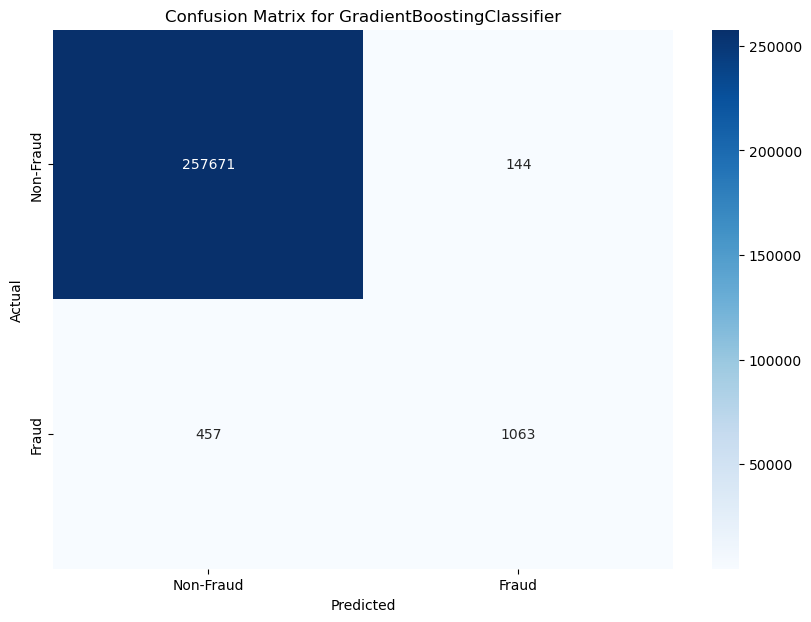

In [38]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_test_pred_gb)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraud', 'Fraud'], 
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.show()

**Summary:**

The GradientBoostingClassifier performs exceptionally well with an accuracy of 1.00 and high precision and recall for the majority class (0). This reflects strong overall performance but may not fully capture effectiveness for the minority class due to dataset imbalance.

Precision for Fraudulent Transactions (1): 0.88, indicating that fraud predictions are correct 88% of the time.\
Recall for Fraudulent Transactions (1): 0.70, showing that the model identifies 70% of actual fraud cases but leaves room for improvement.\
F1-Score for Fraudulent Transactions (1): 0.78, balancing precision and recall.

**Areas for Improvement:**

Recall for Fraudulent Transactions: The recall is lower compared to precision. Enhancing recall would help detect more fraud cases.\
Handling Class Imbalance: Incorporating techniques to address class imbalance, such as resampling or adjusting class weights, could improve performance on the minority class.

In [167]:
# create Pipeline A_S
pipeline_A_S = imPipeline([
    ('preprocessor', preproc1),
    ('sampling', SMOTE(random_state=42)),
    ('model', LogisticRegression())
])

# fit the pipeline
pipeline_A_S.fit(X_train, Y_train)

# evaluate Pipeline A, using cross-validation
cv_res_A = cross_validate(pipeline_A_S, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

# convert results to DataFrame
cv_res_A_S_df = pd.DataFrame(cv_res_A).assign(experiment=5)
cv_res_A_S_df

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_roc_auc,train_roc_auc,test_fpr,train_fpr,test_fnr,train_fnr,experiment
0,13.303678,0.896730,0.993175,0.993406,0.880333,0.880791,0.931058,0.931320,0.923938,0.944395,0.119231,0.118969,0.194653,0.160576,5
1,13.317178,0.937186,0.992983,0.993444,0.882155,0.882572,0.932090,0.932332,0.909664,0.946923,0.117229,0.117205,0.223893,0.155774,5
2,12.938134,0.895986,0.992918,0.993469,0.884604,0.886166,0.933476,0.934369,0.904016,0.948614,0.114703,0.113603,0.234754,0.153686,5
3,12.937543,0.920022,0.993072,0.993436,0.883611,0.883309,0.932917,0.932750,0.910937,0.945845,0.115838,0.116456,0.211362,0.157235,5
4,12.725317,0.897003,0.993003,0.993434,0.877832,0.880039,0.929628,0.930894,0.914515,0.945604,0.121612,0.119750,0.217863,0.156224,5
